Q1

In [1]:
#Roll No: 20EC39002, 20EC39054
class BMP_struct:
  # data structure for BMP file

  filename = ""
  #Header : 14 bytes
  signature = 'BM'                  # 2 bytes
  file_size = 0                     # 4 bytes
  reserved = 0                      # 4 bytes
  data_offset = 0                   # 4 bytes

  #BMP info Header : 40 bytes
  size = 0                          # 4 bytes
  width = 0                         # 4 bytes
  height = 0                        # 4 bytes
  planes = 0                        # 2 bytes
  bits_per_pixel = 0                # 2 bytes
  compression = 0                   # 4 bytes
  image_size = 0                    # 4 bytes
  x_pixel_per_M = 0                 # 4 bytes
  y_pixel_per_M = 0                 # 4 bytes
  colors_used = 0                   # 4 bytes
  important_colors = 0              # 4 bytes

  color_table = 0                   # 4*colors_used bytes

  pixel_data = 0                    # width*hight * bits_per_pixel/8 bytes

  #class meathod
  def __str__(self):
    print(self.filename, "file structure:")
    print("")
    print("Signature          : ", self.signature)
    print("File Size          : ", self.file_size/1024, "KB")
    print("Reserved           : ", self.reserved)
    print("Data Offset        : ", self.data_offset)
    print("Size               : ", self.size, "bytes")
    print("Width              : ", self.width, "px")
    print("Height             : ", self.height, "px")
    print("Planes             : ", self.planes)
    print("Bits Per Pixel     : ", self.bits_per_pixel)
    print("Compression        : ", self.compression)
    print("Image Size         : ", self.image_size/1024, "KB")
    print("X Pixel per Meter  : ", self.x_pixel_per_M)
    print("Y Pixel per Meter  : ", self.y_pixel_per_M)
    print("Colors Used        : ", self.colors_used)
    print("Important Colors   : ", self.important_colors)
    print("Color Table        : ", self.color_table)
    print("Pixel Data         : ", self.pixel_data)
    return ""



Read .bmp image

In [3]:
def read_bmp(filename):
  # reads BMP file and returns its structure (BMP_struct)

  file = open(filename, "rb")
  data = bytearray(file.read())
  lb = list(data)
  file.close()
  if lb[0] != 66 or lb[1] != 77:
    print("Error: input is not an bmp file")
    return

  bmp = BMP_struct()
  bmp.filename = filename
  #header
  bmp.signature = chr(lb[0]) + chr(lb[1])
  bmp.file_size = ((lb[5]<<24)|(lb[4]<<16)|(lb[3]<<8)|lb[2])#2:5
  bmp.reserved = ((lb[9]<<24)|(lb[8]<<16)|(lb[7]<<8)|lb[6])#6:9
  bmp.data_offset = ((lb[13]<<24)|(lb[12]<<16)|(lb[11]<<8)|lb[10])#10:13

  #info header
  bmp.size = ((lb[17]<<24)|(lb[16]<<16)|(lb[15]<<8)|lb[14])#14:17
  bmp.width = ((lb[21]<<24)|(lb[20]<<16)|(lb[19]<<8)|lb[18])#18:21
  bmp.height = ((lb[25]<<24)|(lb[24]<<16)|(lb[23]<<8)|lb[22])#22:25
  bmp.planes = ((lb[27]<<8)|lb[26])#26:27
  bmp.bits_per_pixel = ((lb[29]<<8)|lb[28])#28:29
  bmp.compression = ((lb[33]<<24)|(lb[32]<<16)|(lb[31]<<8)|lb[30])#30:33
  bmp.image_size = ((lb[37]<<24)|(lb[36]<<16)|(lb[35]<<8)|lb[34])#34:37
  bmp.x_pixel_per_M = ((lb[41]<<24)|(lb[40]<<16)|(lb[39]<<8)|lb[38])#38:41
  bmp.y_pixel_per_M = ((lb[45]<<24)|(lb[44]<<16)|(lb[43]<<8)|lb[42])#42:45
  bmp.colors_used = ((lb[49]<<24)|(lb[48]<<16)|(lb[47]<<8)|lb[46])#46:49
  bmp.important_colors = ((lb[53]<<24)|(lb[52]<<16)|(lb[51]<<8)|lb[50])#50:53
  bmp.color_table = lb[54:4*pow(2, bmp.bits_per_pixel)+54]
  bmp.pixel_data = lb[bmp.data_offset:]

  return bmp

corn_bmp = read_bmp('corn.bmp')
print(corn_bmp)

corn.bmp file structure:

Signature          :  BM
File Size          :  127.498046875 KB
Reserved           :  0
Data Offset        :  1078
Size               :  40 bytes
Width              :  312 px
Height             :  415 px
Planes             :  1
Bits Per Pixel     :  8
Compression        :  0
Image Size         :  126.4453125 KB
X Pixel per Meter  :  0
Y Pixel per Meter  :  0
Colors Used        :  256
Important Colors   :  0
Color Table        :  [12, 5, 15, 0, 100, 93, 93, 0, 17, 2, 147, 0, 71, 169, 241, 0, 32, 111, 196, 0, 13, 2, 79, 0, 66, 43, 153, 0, 176, 169, 161, 0, 54, 40, 86, 0, 124, 98, 203, 0, 120, 107, 101, 0, 20, 4, 205, 0, 64, 39, 214, 0, 161, 205, 243, 0, 18, 66, 143, 0, 16, 6, 111, 0, 35, 30, 44, 0, 33, 97, 170, 0, 126, 97, 243, 0, 133, 170, 195, 0, 123, 106, 147, 0, 78, 118, 195, 0, 69, 71, 90, 0, 95, 67, 215, 0, 67, 72, 149, 0, 14, 49, 119, 0, 10, 6, 47, 0, 83, 99, 161, 0, 20, 5, 167, 0, 152, 132, 147, 0, 174, 237, 248, 0, 124, 202, 247, 0, 21, 5, 241, 0, 126, 

Q2

Write .bmp file

cameraman.bmp file structure:

Signature          :  BM
File Size          :  65.052734375 KB
Reserved           :  0
Data Offset        :  1078
Size               :  40 bytes
Width              :  256 px
Height             :  256 px
Planes             :  1
Bits Per Pixel     :  8
Compression        :  0
Image Size         :  64.0 KB
X Pixel per Meter  :  0
Y Pixel per Meter  :  0
Colors Used        :  256
Important Colors   :  0
Color Table        :  [0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 0, 3, 3, 3, 0, 4, 4, 4, 0, 5, 5, 5, 0, 6, 6, 6, 0, 7, 7, 7, 0, 8, 8, 8, 0, 9, 9, 9, 0, 10, 10, 10, 0, 11, 11, 11, 0, 12, 12, 12, 0, 13, 13, 13, 0, 14, 14, 14, 0, 15, 15, 15, 0, 16, 16, 16, 0, 17, 17, 17, 0, 18, 18, 18, 0, 19, 19, 19, 0, 20, 20, 20, 0, 21, 21, 21, 0, 22, 22, 22, 0, 23, 23, 23, 0, 24, 24, 24, 0, 25, 25, 25, 0, 26, 26, 26, 0, 27, 27, 27, 0, 28, 28, 28, 0, 29, 29, 29, 0, 30, 30, 30, 0, 31, 31, 31, 0, 32, 32, 32, 0, 33, 33, 33, 0, 34, 34, 34, 0, 35, 35, 35, 0, 36, 36, 36, 0, 37, 37, 37, 0, 38,

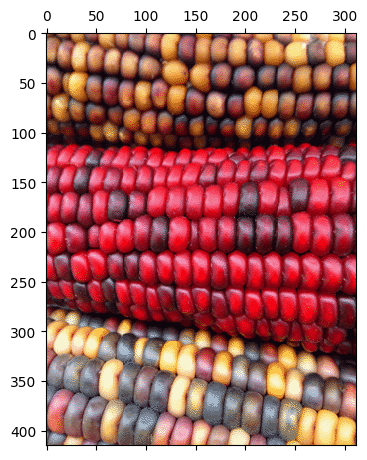

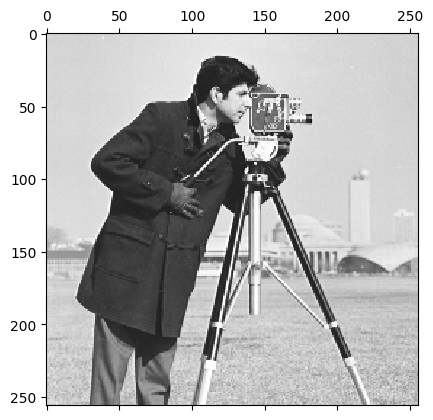

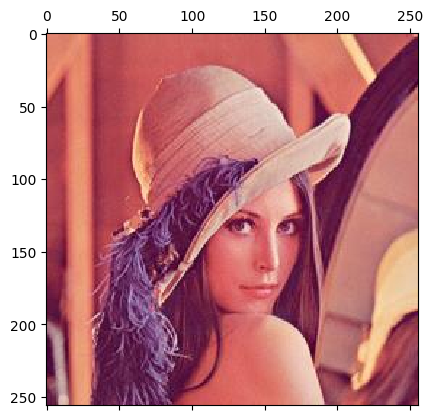

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

def write_bmp(filename, bmp_head: BMP_struct, pixel_data):
  if (bmp_head.bits_per_pixel == 8):
    #use colormap
    color_list = bmp_head.color_table
    color_list = np.array(color_list)
    color_list = color_list.reshape(256, 4)
    color_list = np.delete(color_list, 3, 1)
    color_list = color_list/255
    color_list = np.fliplr(color_list)
    _8_bit_color_map = col.ListedColormap(color_list, name="custom", N=256)
    bitmap = np.array(pixel_data)
    bitmap = bitmap.reshape((bmp_head.height, bmp_head.width))
    bitmap = np.flipud(bitmap)
    plt.matshow(bitmap, cmap = _8_bit_color_map, vmin=0, vmax=255)
    plt.imsave(filename, bitmap, cmap = _8_bit_color_map, format = 'bmp', vmin=0, vmax=255)

  if(bmp_head.bits_per_pixel == 24):
    #dont use colormap
    bitmap = np.array(pixel_data)
    bitmap = bitmap.reshape((bmp_head.height, bmp_head.width, 3))
    bitmap = np.flipud(bitmap)
    bitmap[:,:,[0, 2]] = bitmap[:,:,[2, 0]]
    plt.matshow(bitmap)
    plt.imsave(filename, bitmap/255, format = 'bmp')


write_bmp("cornNew.bmp", corn_bmp, corn_bmp.pixel_data)
cameraman_bmp = read_bmp("cameraman.bmp")
print(cameraman_bmp)
write_bmp("cameramanNew.bmp", cameraman_bmp, cameraman_bmp.pixel_data)
lena_colored_bmp = read_bmp("lena_colored_256.bmp")
print(lena_colored_bmp)
write_bmp("lena_coloredNew.bmp", lena_colored_bmp, lena_colored_bmp.pixel_data)

Q3
Color Channel Manipulation:

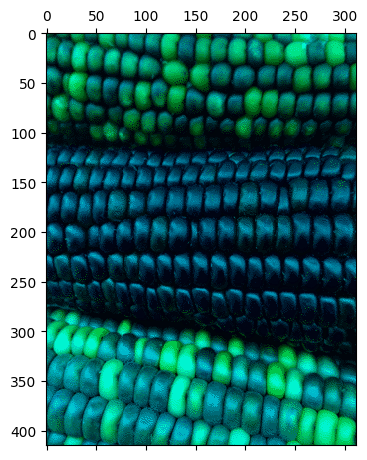

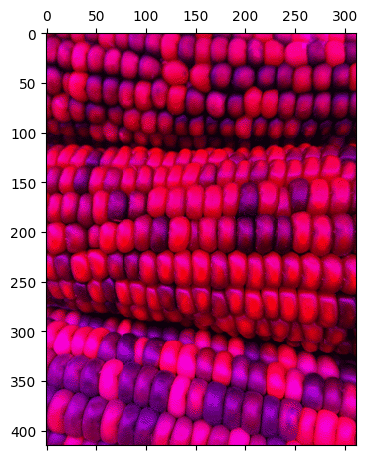

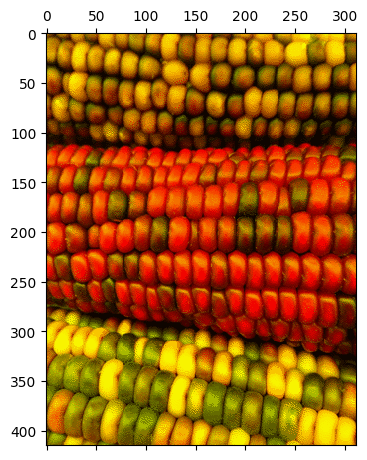

In [5]:
corn_bmp = read_bmp("corn.bmp")
color_list = corn_bmp.color_table
color_list = np.array(color_list)
color_list = color_list.reshape(256, 4)

# R channel = 0
colmapGB = np.copy(color_list)
colmapGB[:,[2]]= 0
corn_bmp.color_table = np.squeeze(colmapGB)
write_bmp("corn_GB_channel.bmp", corn_bmp, corn_bmp.pixel_data)

# G channel = 0
colmapRB = np.copy(color_list)
colmapRB[:,[1]] = 0
corn_bmp.color_table = np.squeeze(colmapRB)
write_bmp("corn_RB_channel.bmp", corn_bmp, corn_bmp.pixel_data)

# # B channel = 0
colmapRG = np.copy(color_list)
colmapRG[:,[0]] = 0
corn_bmp.color_table = np.squeeze(colmapRG)
write_bmp("corn_RG_channel.bmp", corn_bmp, corn_bmp.pixel_data)


